Predict with pre-trained YOLO models
==========================================

This notebook shows how to play with pre-trained YOLO models with only a few
lines of code.

First let's import some necessary libraries:


In [1]:
! pip install -q gluoncv

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

Load a pretrained model
-------------------------

Let's get an YOLOv3 model trained with on Pascal VOC
dataset with Darknet53 as the base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.



In [3]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:03, 56704.35KB/s]                            


Pre-process an image
--------------------

Next we download an image, and pre-process with preset data transforms. Here we
specify that we resize the short edge of the image to 512 px. You can
feed an arbitrarily sized image.
Once constraint for YOLO is that input height and width can be divided by 32.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.yolo.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.



In [4]:
# import the datasets
import boto3
import os
from os import path
import pandas as pd
import zipfile

bucketname = 'mlu-courses-datalake' # replace with your bucket name
filename = 'MLA-CV/data/catdog.png' # replace with your object key

pathname = '../../data/'
s3 = boto3.resource('s3')
if not path.exists("../../data/"):
    try:
        os.makedirs(pathname)
    except OSError:
        print ("Creation of the directory %s failed" % path)

s3.Bucket(bucketname).download_file(filename , '../../data/catdog.png')

print ("Successfully created the directory %s " % path)

Successfully created the directory <module 'posixpath' from '/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/posixpath.py'> 


In [5]:
im_fname = '../../data/catdog.png'
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 664)


Inference and display
---------------------

The forward function will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



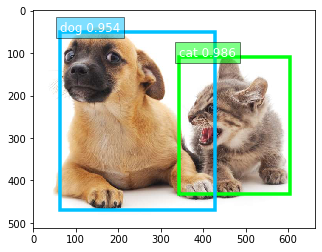

In [6]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()